In [36]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import rioxarray
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
raster_data = rioxarray.open_rasterio(
    "TCI.tif"
)


In [24]:
raster_data

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4e+05 4e+05 4e+05 ... 5.097e+05 5.097e+05 5.098e+05
  * y            (y) float64 2.1e+06 2.1e+06 2.1e+06 ... 1.99e+06 1.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [28]:
raster_data.rio.crs

CRS.from_epsg(32643)

In [27]:
polygon = gpd.read_file('polygon.geojson')
polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
polygon.to_crs("EPSG:32643", inplace=True)
polygon

,geometry
0,"POLYGON ((412858.161 2091269.991, 412765.250 2..."


In [41]:
clipped = raster_data.rio.clip(polygon.geometry.values, polygon.crs, drop=False)


In [31]:
clipped

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
array([[[ 82, 117, 103, ...,  70,  69,  74],
        [ 86, 108,  83, ...,  61,  65,  66],
        [ 91,  80,  76, ...,  66,  72,  68],
        ...,
        [ 73,  79,  71, ...,  47,  47,  55],
        [ 67,  66,  59, ...,  48,  43,  44],
        [ 43,  45,  56, ...,  40,  39,  40]],

       [[ 96, 112, 113, ...,  72,  69,  71],
        [106,  95,  96, ...,  71,  72,  71],
        [ 99,  75,  95, ...,  76,  79,  75],
        ...,
        [ 70,  84,  76, ...,  48,  47,  50],
        [ 71,  75,  65, ...,  52,  52,  46],
        [ 58,  60,  62, ...,  54,  57,  51]],

       [[ 47,  80,  62, ...,  39,  37,  45],
        [ 60,  67,  50, ...,  36,  37,  39],
        [ 57,  52,  54, ...,  39,  41,  37],
        ...,
        [ 39,  45,  42, ...,  25,  27,  33],
        [ 37,  39,  41, ...,  26,  26,  20],
        [ 24,  21,  32, ...,  25,  25,  19]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4e+05 4e+05 4e+05 ... 5.097e+05 5.097e+05 5.098e+05
  * y            (y) float64 2.1e+06 2.1e+06 2.1e+06 ... 1.99e+06 1.99e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

In [33]:
zero_mask = (clipped == 0)

# Count the number of zero values
num_zero_values = zero_mask.sum()
num_zero_values

<xarray.DataArray ()>
array(16365538)
Coordinates:
    spatial_ref  int64 0

In [44]:
# Calculate the mean pixel value
mean_value = clipped.mean()

# Print the mean pixel value
print(f"Mean Pixel Value: {mean_value.values}")

Mean Pixel Value: 3.018234190773532


In [42]:
clipped.rio.to_raster("cliped_TCI.tif")

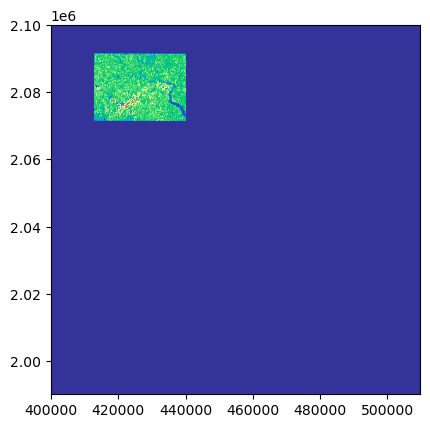

<Axes: >

In [43]:
clipped_data = rasterio.open("cliped_TCI.tif")
show((clipped_data, 1), cmap='terrain')